In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [192]:
# Load data
dataset = pd.read_csv('train.csv')
dataset.dtypes


battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [193]:
# features and labels
X = dataset.iloc[:, 0:20].values
y = dataset.iloc[:, 20].values

# Normalization
for i, x in enumerate(X):
    minVal = np.min(x)
    norm_x = np.subtract(x, minVal)
    maxVal = np.max(norm_x)
    norm_x = np.divide(norm_x, maxVal)
    X[i] = norm_x

# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [194]:
Xt=list(X_train)
yt=list(y_train)
Xt

[array([9.80111376e-01, 0.00000000e+00, 2.30708035e-03, 7.95544948e-04,
        7.95544948e-04, 7.95544948e-04, 1.90930788e-02, 2.38663484e-04,
        1.34447096e-01, 3.97772474e-03, 1.35242641e-02, 2.87191726e-01,
        6.43595863e-01, 1.00000000e+00, 1.27287192e-02, 7.95544948e-03,
        1.27287192e-02, 7.95544948e-04, 0.00000000e+00, 0.00000000e+00]),
 array([1.00000000e+00, 0.00000000e+00, 2.71739130e-04, 5.43478261e-04,
        6.52173913e-03, 0.00000000e+00, 1.84782609e-02, 3.80434783e-04,
        7.71739130e-02, 5.43478261e-04, 8.69565217e-03, 1.69021739e-01,
        8.39673913e-01, 5.85869565e-01, 4.34782609e-03, 0.00000000e+00,
        5.43478261e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([4.47737497e-01, 0.00000000e+00, 5.55702567e-04, 0.00000000e+00,
        1.05848108e-03, 2.64620270e-04, 5.29240540e-04, 2.38158243e-04,
        2.80497486e-02, 2.64620270e-04, 4.49854459e-03, 5.02513893e-01,
        5.03836994e-01, 1.00000000e+00, 2.38158243e-03, 7.93

In [195]:
dataset.shape

(2000, 21)

In [196]:
from sklearn.cluster import KMeans
#cluster_data = list(zip(list(Xt), list(yt)))
cluster_data=[]
for i in range(0,len(Xt)):
    cluster_data.append(list(Xt[i]))

len(cluster_data)

1600

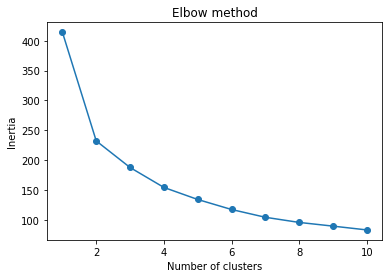

In [197]:
inertias=[]
for i in range(1,11):
    ball= KMeans(n_clusters=i)
    ball.fit(cluster_data)
    inertias.append(ball.inertia_)
    
    

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [198]:
cluster_data

[[0.9801113762927606,
  0.0,
  0.002307080350039777,
  0.0007955449482895784,
  0.0007955449482895784,
  0.0007955449482895784,
  0.01909307875894988,
  0.0002386634844868735,
  0.13444709626093873,
  0.003977724741447892,
  0.013524264120922832,
  0.2871917263325378,
  0.6435958631662689,
  1.0,
  0.012728719172633254,
  0.007955449482895784,
  0.012728719172633254,
  0.0007955449482895784,
  0.0,
  0.0],
 [1.0,
  0.0,
  0.0002717391304347826,
  0.0005434782608695652,
  0.006521739130434782,
  0.0,
  0.01847826086956522,
  0.00038043478260869565,
  0.07717391304347826,
  0.0005434782608695652,
  0.008695652173913044,
  0.16902173913043478,
  0.8396739130434783,
  0.5858695652173913,
  0.004347826086956522,
  0.0,
  0.005434782608695652,
  0.0,
  0.0,
  0.0],
 [0.4477374966922466,
  0.0,
  0.0005557025668166182,
  0.0,
  0.0010584810796507012,
  0.0002646202699126753,
  0.0005292405398253506,
  0.0002381582429214078,
  0.028049748610743584,
  0.0002646202699126753,
  0.0044985445885154

In [199]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(cluster_data)

kmeans.labels_

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [200]:
clusters=[0,1]
num_clusters=len(clusters)

## Training

In [201]:
# cluster_partitions = []
# for c in clusters:
#     partition = X_train[y_train == c]
#     # partition = dataset.loc[dataset['price_range'] == 0].iloc[:, :-1].values
#     cluster_partitions.append(partition)
# type(cluster_partitions)

In [202]:
cluster_partitions = []
for j in range(num_clusters):
    partition=[]
    for i in range(X_train.shape[0]):
        if kmeans.labels_[i]==j:
            partition.append(X_train[i])
    cluster_partitions.append(partition)

In [203]:
len(cluster_partitions[0])

945

In [204]:
K_VALUES = [3,5,7,9,11,13,15]

# Finding best k per cluster
k_clusters = [0 for _ in range(num_clusters)]
for i in range(num_clusters):
    data = cluster_partitions[i]
    label = clusters[i]
    
    K_values_train = Counter()
    match = 0
    for test_point_index, test_point in enumerate(data):
        distances_dict = Counter()
        cluster_count = Counter()

        for index, train_point in enumerate(X_train):
            distances_dict[index] = np.sum(np.square(test_point - train_point))

        matched_k_list = []
        for K in K_VALUES:
            for point_index, point in distances_dict.most_common()[-(K + 1):-1]:
                cluster_count[y_train[point_index]] += 1

            if cluster_count.most_common(1)[0][0] == y_train[test_point_index]:
                matched_k_list.append(K)
        K_values_train[test_point_index] = matched_k_list
        
    # Taking the first best k value in case of ties
    k_clusters[i] = K_values_train.most_common(1)[0][1][0]
    
k_clusters

[15, 15]

## Testing

In [205]:
match = 0
total = 0
y_pred = [0 for i in range(len(y_test))]
for test_point_index, test_point in enumerate(X_test):
    distances_dict = Counter()
    for index, train_point in enumerate(X_train):
        distances_dict[index] = np.sum(np.square(test_point - train_point))
    
    fractions = [0 for _ in range(num_clusters)]
    for i, c in enumerate(clusters):
        K = k_clusters[i]
        
        cluster_count = Counter()
        for point_index, point in distances_dict.most_common()[-K:]:
            cluster_count[y_train[point_index]] += 1

        num_c = cluster_count[c]
        t = sum(cluster_count.values())
        fractions[i] = num_c / t
        
    max_fraction = fractions[0]
    labelIdx = 0
    for i, fraction in enumerate(fractions):
        if fraction > max_fraction:
            max_fraction = fraction
            labelIdx = i
    
    label = clusters[labelIdx]
    y_pred[test_point_index] = label
    
    if label == y_test[test_point_index]:
        match += 1
    total += 1
    
accuracy = match / total
print(accuracy)
print(y_pred == y_test)

0.3775
[False False False False False  True  True False False  True False False
  True False False  True False False False  True False  True False  True
 False False False  True False  True  True  True False False  True False
  True  True False False False  True False False  True False  True  True
 False  True  True False False False  True False False False  True False
 False  True False False  True False False False False False False False
 False  True  True False False False  True False False False False  True
  True  True False False False False  True False False  True  True False
 False False  True False  True  True False  True False False False False
 False False False  True False  True False False False  True  True  True
 False False False False  True  True  True  True  True False  True False
 False False False False False False  True  True  True False  True False
 False False  True  True False  True  True  True  True  True False  True
  True False  True False False False False  